In [1]:
from astropy.io import fits
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import sys
import xidplus
import pickle
import scipy.stats as stats
from scipy.stats import norm

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#---Read in truth catalogue---
folder='/Users/pdh21/HELP/XID_plus/test_files/'
#'/research/astro/fir/cclarke/lacey/released/'
hdulist=fits.open(folder+'lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')
fcat_sim=hdulist[1].data
hdulist.close()

fcat_sim=fcat_sim[fcat_sim['S100']>0.050]

In [8]:
idx_xidp=fcat_sim['S100'] >0.050#cut so that only sources with a 100micron flux of > 50 micro janskys (Roseboom et al. 2010 cut 24 micron sources at 50microJys)
idx_xidpT=fcat_sim['S100'] >0.050#cut so that only sources with a 100micron flux of > 50 micro janskys (Roseboom et al. 2010 cut 24 micron sources at 50microJys)


#---Read in XID+ posterior---

#folder='/research/astro/fir/HELP/XID_plus_output/100micron/log_prior_flux/'
folder='/Users/pdh21/HELP/XID_plus_output/100micron/conf_noise/uniform_prior/'
#'/research/astro/fir/HELP/XID_plus_output/100micron/log_uniform_prior_test/old/'
infile=folder+'Master_prior.pkl'
with open(infile, "rb") as f:
    obj = pickle.load(f)
prior250=obj['psw']
prior350=obj['pmw']    
prior500=obj['plw']

folder='/Users/pdh21/HELP/XID_plus_output/100micron/conf_noise/uniform_prior/'
infile=folder+'master_posterior.pkl'

with open(infile, "rb") as f:
    obj = pickle.load(f)
posterior=obj['posterior']

samples,chains,params=posterior.shape

flattened_post=posterior.reshape(samples*chains,params)

In [9]:
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
sns.set(font_scale=1.5)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.set_context("poster")

rcParams.update({'font.size': 20})
pp = PdfPages('/Users/pdh21/HELP/XID_plus/Paper/Detections.pdf')
sns.set(color_codes=True)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("ticks")

In [10]:
pctiles=np.percentile(flattened_post, [16,50,84], axis=0)

In [11]:
pctiles.shape

(3, 194478)

In [12]:
print fcat_sim['RA'][idx_xidp]
id=(pctiles[1,0:prior250.nsrc]>4) & (pctiles[1,prior250.nsrc+1:2*prior250.nsrc+1]>4) & (pctiles[1,2*prior250.nsrc+2:3*prior250.nsrc+2]>4)
print id.sum()

[ 149.96883137  149.99619909  150.92582623 ...,  149.68114305  150.55617263
  150.7361606 ]
9016


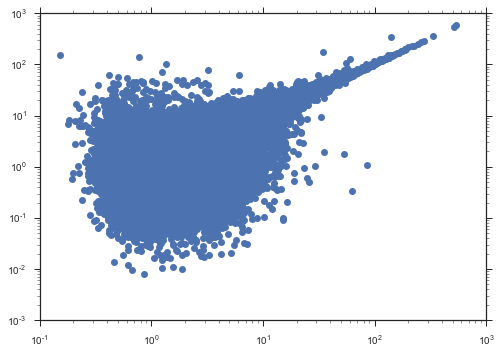

In [13]:
plt.loglog(pctiles[1,np.arange(0,prior250.nsrc)],fcat_sim['S250'][idx_xidp],'o')

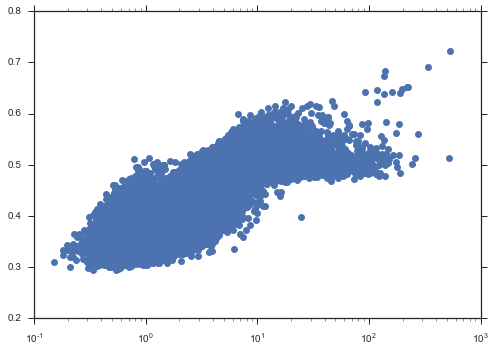

In [14]:
plt.semilogx(pctiles[1,np.arange(0,prior250.nsrc)],(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)]),'o')

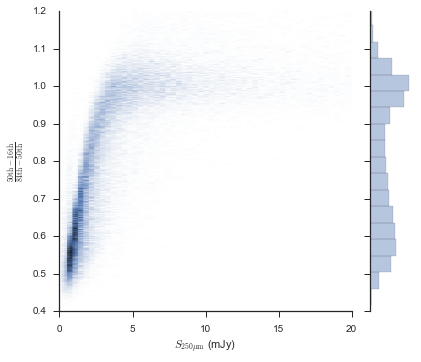

In [15]:
plot=sns.jointplot(pctiles[1,np.arange(0,prior250.nsrc)],(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[1,np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.40,1.2)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{250\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)

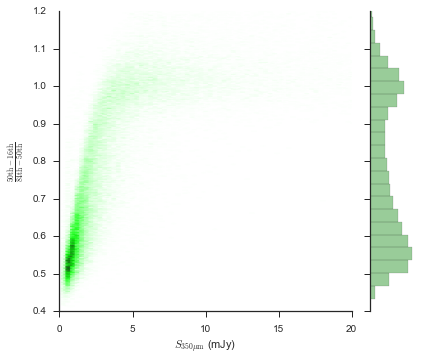

In [16]:
plot=sns.jointplot(pctiles[1,prior250.nsrc+1+np.arange(0,prior250.nsrc)],(pctiles[1,prior250.nsrc+1+np.arange(0,prior250.nsrc)]-pctiles[0,prior250.nsrc+1+np.arange(0,prior250.nsrc)])/(pctiles[2,prior250.nsrc+1+np.arange(0,prior250.nsrc)]-pctiles[1,prior250.nsrc+1+np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,color='green',rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.4,1.2)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{350\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)

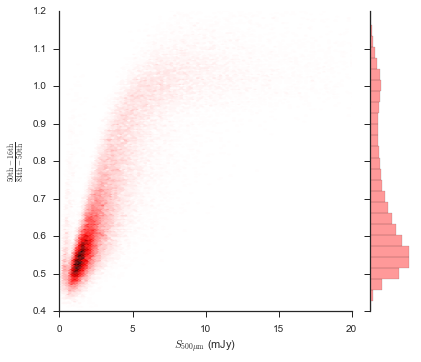

In [17]:
plot=sns.jointplot(pctiles[1,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)],(pctiles[1,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]-pctiles[0,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)])/(pctiles[2,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]-pctiles[1,2*prior250.nsrc+2+np.arange(0,prior250.nsrc)]),kind="hex",stat_func=None,color='red',rasterized=True);
plot.ax_joint.set_xlim(0,20)
plot.ax_joint.set_ylim(0.4,1.2)
plot.ax_marg_x.remove()
plot.set_axis_labels(r'$S_{500\mathrm{\mu m}}$ (mJy)',r'$\frac{\mathrm{50th - 16th}}{\mathrm{84th - 50th}}$')
plt.tight_layout()
pp.savefig(plot.fig)
pp.close()

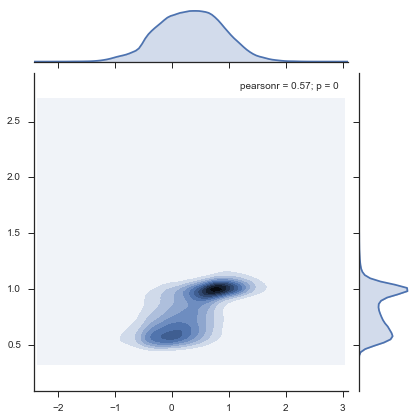

In [18]:
plot=sns.jointplot(np.log10(fcat_sim['S250'][idx_xidp]),(pctiles[1,np.arange(0,prior250.nsrc)]-pctiles[0,np.arange(0,prior250.nsrc)])/(pctiles[2,np.arange(0,prior250.nsrc)]-pctiles[1,np.arange(0,prior250.nsrc)]),kind="kde");


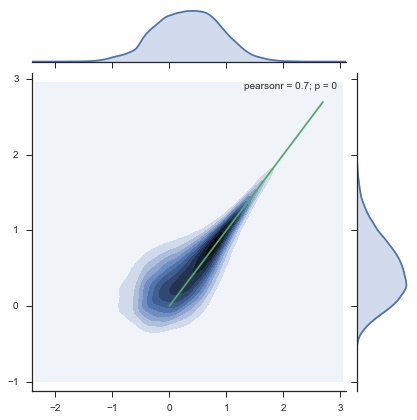

In [19]:
plot=sns.jointplot(np.log10(fcat_sim['S250'][idx_xidp]),np.log10(pctiles[1,np.arange(0,prior250.nsrc)]*1.07),kind="kde");
x=np.arange(0,500)
plot.ax_joint.plot(np.log10(x),np.log10(x))

In [22]:
dir(plot.ax_joint)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 u'_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_axisbg',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_oid',
 '_originalPosition',
 '_path_effects',
 '_pcolorargs',
 '_picker',
 '_

In [23]:
import sys
sys.path.append('/Users/pdh21/Python/stacking/')
from stacking import stack_image


In [41]:
from pymoc import MOC
stack_moc=MOC()
stack_moc.read('/Users/pdh21/HELP/XID_plus/Paper/cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PSW_hipe-2-_MOC.fits')

In [47]:
from xidplus import moc_routines as mcr
pixs=mcr.get_HEALPix_pixels(15,fcat_sim['RA'],fcat_sim['DEC'],unique=False)
ind_moc=[]
for i in range(0,fcat_sim['RA'].size):
    ind_moc.append(stack_moc.contains(15,pixs[i]))

In [48]:
ind_moc

[True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 T

In [56]:
bins_mstar=np.linspace(9,11,num=5,endpoint=True,)
inds_mstar = np.digitize(np.log10(fcat_sim['MSTARS_TOT']), bins_mstar)
bins_red=np.linspace(0,3,num=5,endpoint=True)
inds_red = np.digitize(fcat_sim['Z_OBS'], bins_red)
S250_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S250_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S250_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))
S350_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S350_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S350_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))
S500_Mstar=np.empty((bins_mstar.size+1,bins_red.size+1))
S500_Mstar_truth=np.empty((bins_mstar.size+1,bins_red.size+1))
S500_Mstar_xidplus=np.empty((bins_mstar.size+1,bins_red.size+1,3000))
S500_Mstar_xidplus[:,:]=0.0

print len(inds_mstar)

64824


In [62]:
np.array(ind_moc)==True

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

number of galaxies: 2427
number of galaxies: 2427
number of galaxies: 2427
number of galaxies: 75
number of galaxies: 75
number of galaxies: 75
number of galaxies: 328
number of galaxies: 328
number of galaxies: 328
number of galaxies: 533
number of galaxies: 533
number of galaxies: 533
number of galaxies: 88
number of galaxies: 88
number of galaxies: 88
number of galaxies: 3495
number of galaxies: 3495
number of galaxies: 3495
number of galaxies: 2398
number of galaxies: 2398
number of galaxies: 2398
number of galaxies: 1384
number of galaxies: 1384
number of galaxies: 1384
number of galaxies: 1657
number of galaxies: 1657
number of galaxies: 1657
number of galaxies: 515
number of galaxies: 515
number of galaxies: 515
number of galaxies: 3019
number of galaxies: 3019
number of galaxies: 3019
number of galaxies: 7252
number of galaxies: 7252
number of galaxies: 7252
number of galaxies: 3233
number of galaxies: 3233
number of galaxies: 3233
number of galaxies: 2152
number of galaxies: 2

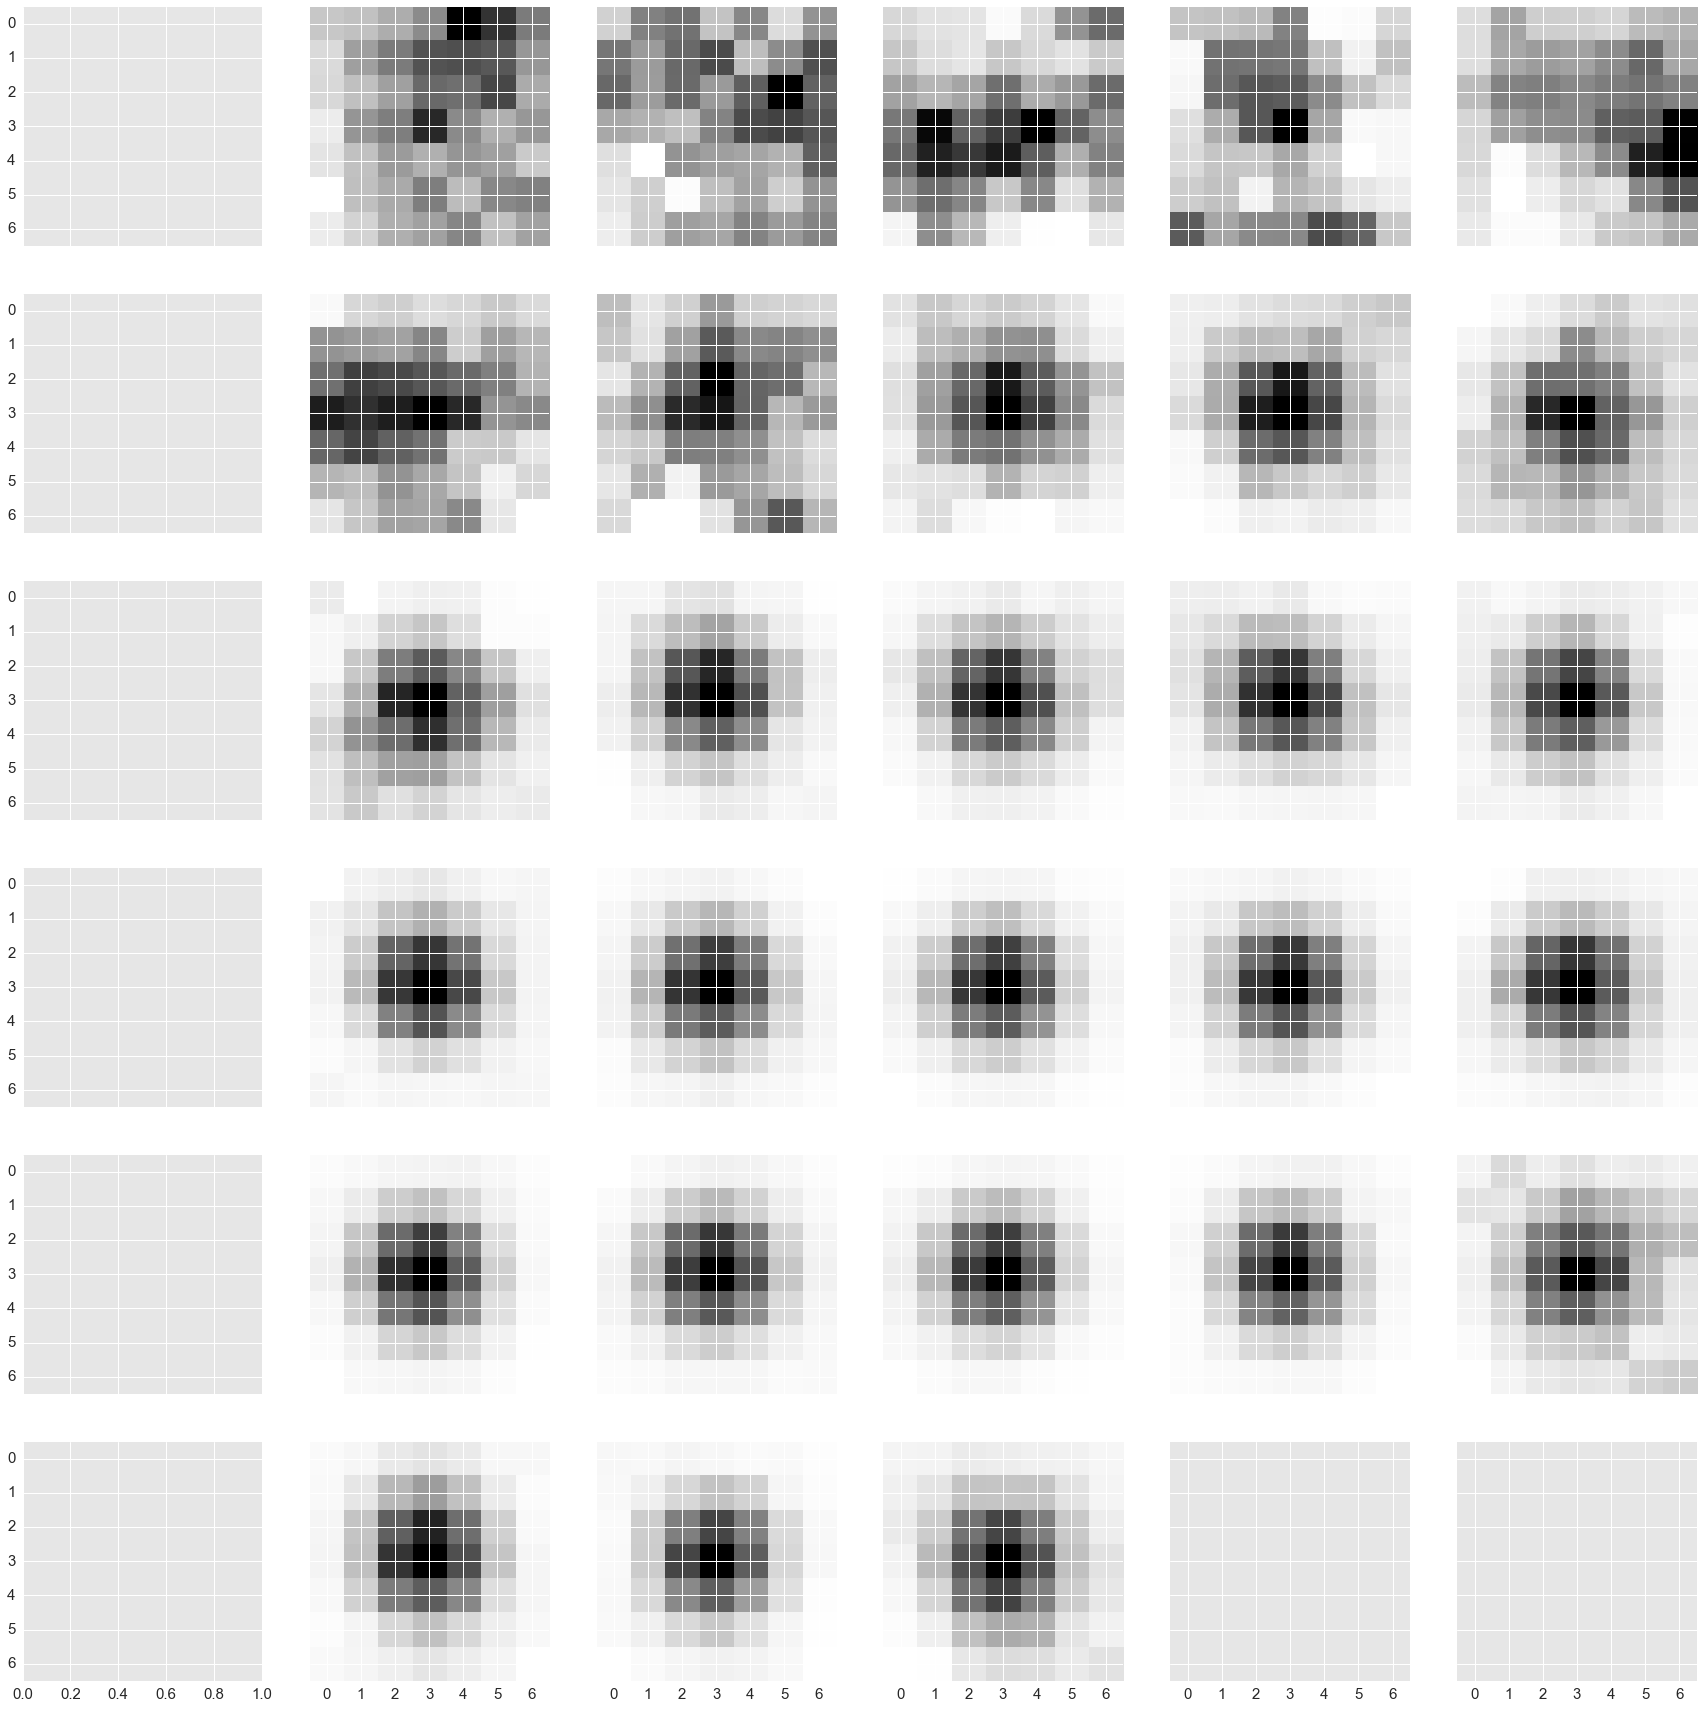

In [124]:
fig = plt.figure(figsize=(30,30))
map250=np.empty((prior250.imhdu['NAXIS2'],prior250.imhdu['NAXIS1']))
map250[prior250.sy_pix,prior250.sx_pix]=prior250.sim
map350=np.empty((prior350.imhdu['NAXIS2'],prior350.imhdu['NAXIS1']))
map350[prior350.sy_pix,prior350.sx_pix]=prior350.sim
map500=np.empty((prior500.imhdu['NAXIS2'],prior500.imhdu['NAXIS1']))
map500[prior500.sy_pix,prior500.sx_pix]=prior500.sim
fig, axarr = plt.subplots(bins_mstar.size+1,bins_red.size+1, sharex='col', sharey='row',figsize=(30,30))
ngals=np.empty((bins_mstar.size+1,bins_red.size+1))
ngals[:,:]=0.0
for i in range(0,bins_mstar.size+1):
    for j in range(0,bins_red.size+1):
        src_boost=False
        ind_stack=np.arange(0,prior250.nsrc)[(inds_mstar==i) & (inds_red==j) & (np.array(ind_moc)==True)]
        if ind_stack.size > 0:
            ra=fcat_sim['RA'][ind_stack]
            dec=fcat_sim['DEC'][ind_stack]
            meanStack250, varStack250, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
            #axarr[i,j].imshow(meanStack250/varStack, interpolation='nearest',vmin=np.min(meanStack250/varStack),vmax=np.max(meanStack250/varStack))
            #axarr[i,j].colorbar()
            S250_Mstar[i,j]=fit(f250, [flux], meanStack250.ravel(),var=varStack250.ravel())[0]#meanStack250[3,3]
            S250_Mstar_truth[i,j]=np.mean(fcat_sim['S250'][ind_stack])
            S250_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,ind_stack],axis=1)
            meanStack350, varStack350, stack, stack2,b1,sig1, mask, nsamp = stack_image(map350,prior350.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
            #plt.subplot(bins.size+1,3,ii+1)
            #plt.imshow(meanStack350, interpolation='nearest',vmin=-10,vmax=20)
            axarr[i,j].imshow(meanStack350, interpolation='nearest',vmin=np.min(meanStack350),vmax=np.max(meanStack350))

            #plt.colorbar()
            S350_Mstar[i,j]=fit(f350, [flux], meanStack350.ravel(),var=varStack350.ravel())[0]#meanStack350[3,3]
            S350_Mstar_truth[i,j]=np.mean(fcat_sim['S350'][ind_stack])
            S350_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,1+prior250.nsrc+ind_stack],axis=1)
            meanStack500, varStack500, stack, stack2,b1,sig1, mask, nsamp = stack_image(map500,prior500.imhdu,ra,dec,med=False,noFilt=False,mask=True,size=5,src_boost=src_boost)
            #plt.subplot(bins.size+1,3,ii+2)
            #plt.imshow(meanStack500, interpolation='nearest',vmin=-10,vmax=20)
            #plt.colorbar()
            S500_Mstar[i,j]=fit(f500, [flux], meanStack500.ravel(),var=varStack500.ravel())[0]#meanStack500[2,2]
            S500_Mstar_truth[i,j]=np.mean(fcat_sim['S500'][ind_stack])
            S500_Mstar_xidplus[i,j,:]=np.mean(flattened_post[:,2+2*prior250.nsrc+ind_stack],axis=1)
            ngals[i,j]=ind_stack.size
    
    

In [121]:
print ngals

[[  2.47233321e-314   7.74596250e+007   2.60096000e+006   1.05076220e+007
    1.76014150e+007   3.02000400e+006]
 [  2.43854943e-314   1.12066671e+008   7.75507340e+007   4.34971200e+007
    5.46625240e+007   1.71203810e+007]
 [  2.37945500e-314   9.64658300e+007   2.36640246e+008   1.05529346e+008
    7.01115340e+007   2.13376220e+007]
 [  2.39415381e-314   6.16656160e+007   2.05525997e+008   1.32251335e+008
    5.35497730e+007   1.09505100e+007]
 [  2.39964959e-314   4.66703150e+007   1.75272380e+008   9.44187820e+007
    1.40833870e+007   6.85416000e+005]
 [  2.52514461e-314   5.41524400e+006   7.91159100e+006   8.54656000e+005
    2.43859490e-314   2.45626316e-314]]


In [103]:
import numpy as np
from scipy import optimize

class Parameter:
    def __init__(self, value):
            self.value = value

    def set(self, value):
            self.value = value

    def __call__(self):
            return self.value

def fit(function, parameters, y, x = None,var=None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return ((y - function(x))**2)/var

    #if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

In [116]:
# giving initial parameters
flux = Parameter(0.0)

# define your function:
def f250(x): return flux()*prior250.prf[50-6*3:51+6*3:6,50-6*3:51+6*3:6].ravel()
def f350(x): return flux()*prior350.prf[50-8*3:51+8*3:8,50-8*3:51+8*3:8].ravel()
def f500(x): return flux()*prior500.prf[50-12*2:51+12*2:12,50-12*2:51+12*2:12].ravel()

# fit! (given that data is an array with the data to fit)
print fit(f250, [flux], meanStack250.ravel(),var=varStack250.ravel()),meanStack250[3,3]

(array([ 17.26021083]), 1) 15.4993500525


In [112]:
print prior500.pindx

[ 0.          0.08333333  0.16666666  0.24999999  0.33333333  0.41666666
  0.49999999  0.58333332  0.66666665  0.74999998  0.83333331  0.91666664
  0.99999998  1.08333331  1.16666664  1.24999997  1.3333333   1.41666663
  1.49999996  1.58333329  1.66666663  1.74999996  1.83333329  1.91666662
  1.99999995  2.08333328  2.16666661  2.24999995  2.33333328  2.41666661
  2.49999994  2.58333327  2.6666666   2.74999993  2.83333326  2.9166666
  2.99999993  3.08333326  3.16666659  3.24999992  3.33333325  3.41666658
  3.49999992  3.58333325  3.66666658  3.74999991  3.83333324  3.91666657
  3.9999999   4.08333323  4.16666657  4.2499999   4.33333323  4.41666656
  4.49999989  4.58333322  4.66666655  4.74999988  4.83333322  4.91666655
  4.99999988  5.08333321  5.16666654  5.24999987  5.3333332   5.41666654
  5.49999987  5.5833332   5.66666653  5.74999986  5.83333319  5.91666652
  5.99999985  6.08333319  6.16666652  6.24999985  6.33333318  6.41666651
  6.49999984  6.58333317  6.66666651  6.74999984  6.

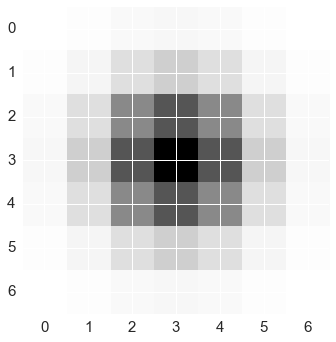

In [113]:
plt.imshow(prior500.prf[50-12*3:51+12*3:12,50-12*3:51+12*3:12], interpolation='nearest')

In [80]:
print bins_mstar.size,bins_red.size

5 5


In [14]:
hdulist_psw=fits.open('/Users/pdh21/astrodata/sims/lacey/cosmos_itermap_simulated_observation_w_noise_PSW_hipe_20160526.fits.gz')

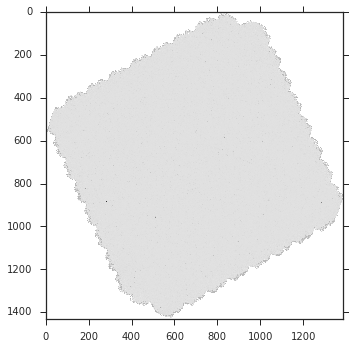

In [63]:
plt.imshow(hdulist_psw[1].data*1000.0)

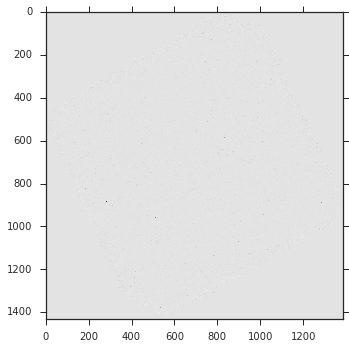

In [64]:
plt.imshow(map250)

In [65]:
meanStack250, varStack, stack_new, stack2,b1,sig1, mask, nsamp = stack_image(hdulist_psw[1].data*1000.0,hdulist_psw[1].header,ra[np.array(index)],dec[np.array(index)],med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack_new/np.sum(fcat_sim['S250'][np.array(index)]))/prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest',vmin=0.9,vmax=1.2)
plt.colorbar()
print np.max(stack_new)/np.sum(fcat_sim['S250'][np.array(index)])

NameError: name 'index' is not defined

In [15]:
#---Read in truth catalogue---
folder='/Users/pdh21/HELP/XID_plus_output/sims/lacy/'
#'/research/astro/fir/cclarke/lacey/released/'
hdulist=fits.open(folder+'lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')
fcat_sim=hdulist[1].data
hdulist.close()
from pymoc import MOC
from xidplus import moc_routines
plw_moc=MOC(filename='/Users/pdh21/astrodata/sims/lacey/cosmos_itermap_simulated_observation_w_noise_PSW_hipe_20160526-2-_MOC.fits')
ra=fcat_sim['RA']
dec=fcat_sim['DEC']
index=moc_routines.check_in_moc(ra,dec,plw_moc,keep_inside=True)
print ra[np.array(index)]
meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,ra[np.array(index)],dec[np.array(index)],med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack/np.sum(fcat_sim['S250'][np.array(index)]))/prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][np.array(index)])            

[ 149.96883137  149.52468147  149.72988799 ...,  150.33316043  150.3431724
  150.79307788]
number of galaxies: 247238


NameError: name 'cmap' is not defined

In [ ]:
plt.imshow((stack/np.sum(fcat_sim['S250'][np.array(index)]))/(stack_new/np.sum(fcat_sim['S250'][np.array(index)])),cmap=cmap,interpolation='nearest')
plt.colorbar()

In [ ]:
meanStack250, varStack, stack, stack2,b1,sig1, mask, nsamp = stack_image(map250,prior250.imhdu,prior250.sra,prior250.sdec,med=False,noFilt=False,mask=True,size=7,src_boost=src_boost)
plt.imshow((stack/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])),cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])

In [ ]:
import seaborn as sns
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

plt.imshow((stack/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])),cmap=cmap,interpolation='nearest')
plt.colorbar()
print np.max(stack)/np.sum(fcat_sim['S250'][fcat_sim['S100'] >0.050])

In [ ]:
plt.imshow(prior250.prf[32:69:6,32:69:6],cmap=cmap,interpolation='nearest')
plt.colorbar()


In [ ]:
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
vmin=-0.05
vmax=0.0
plt.imshow((stack/np.sum(fcat_sim['S500']))-prior500.prf[14:87:12,14:87:12],cmap=cmap,interpolation='nearest')
plt.colorbar()


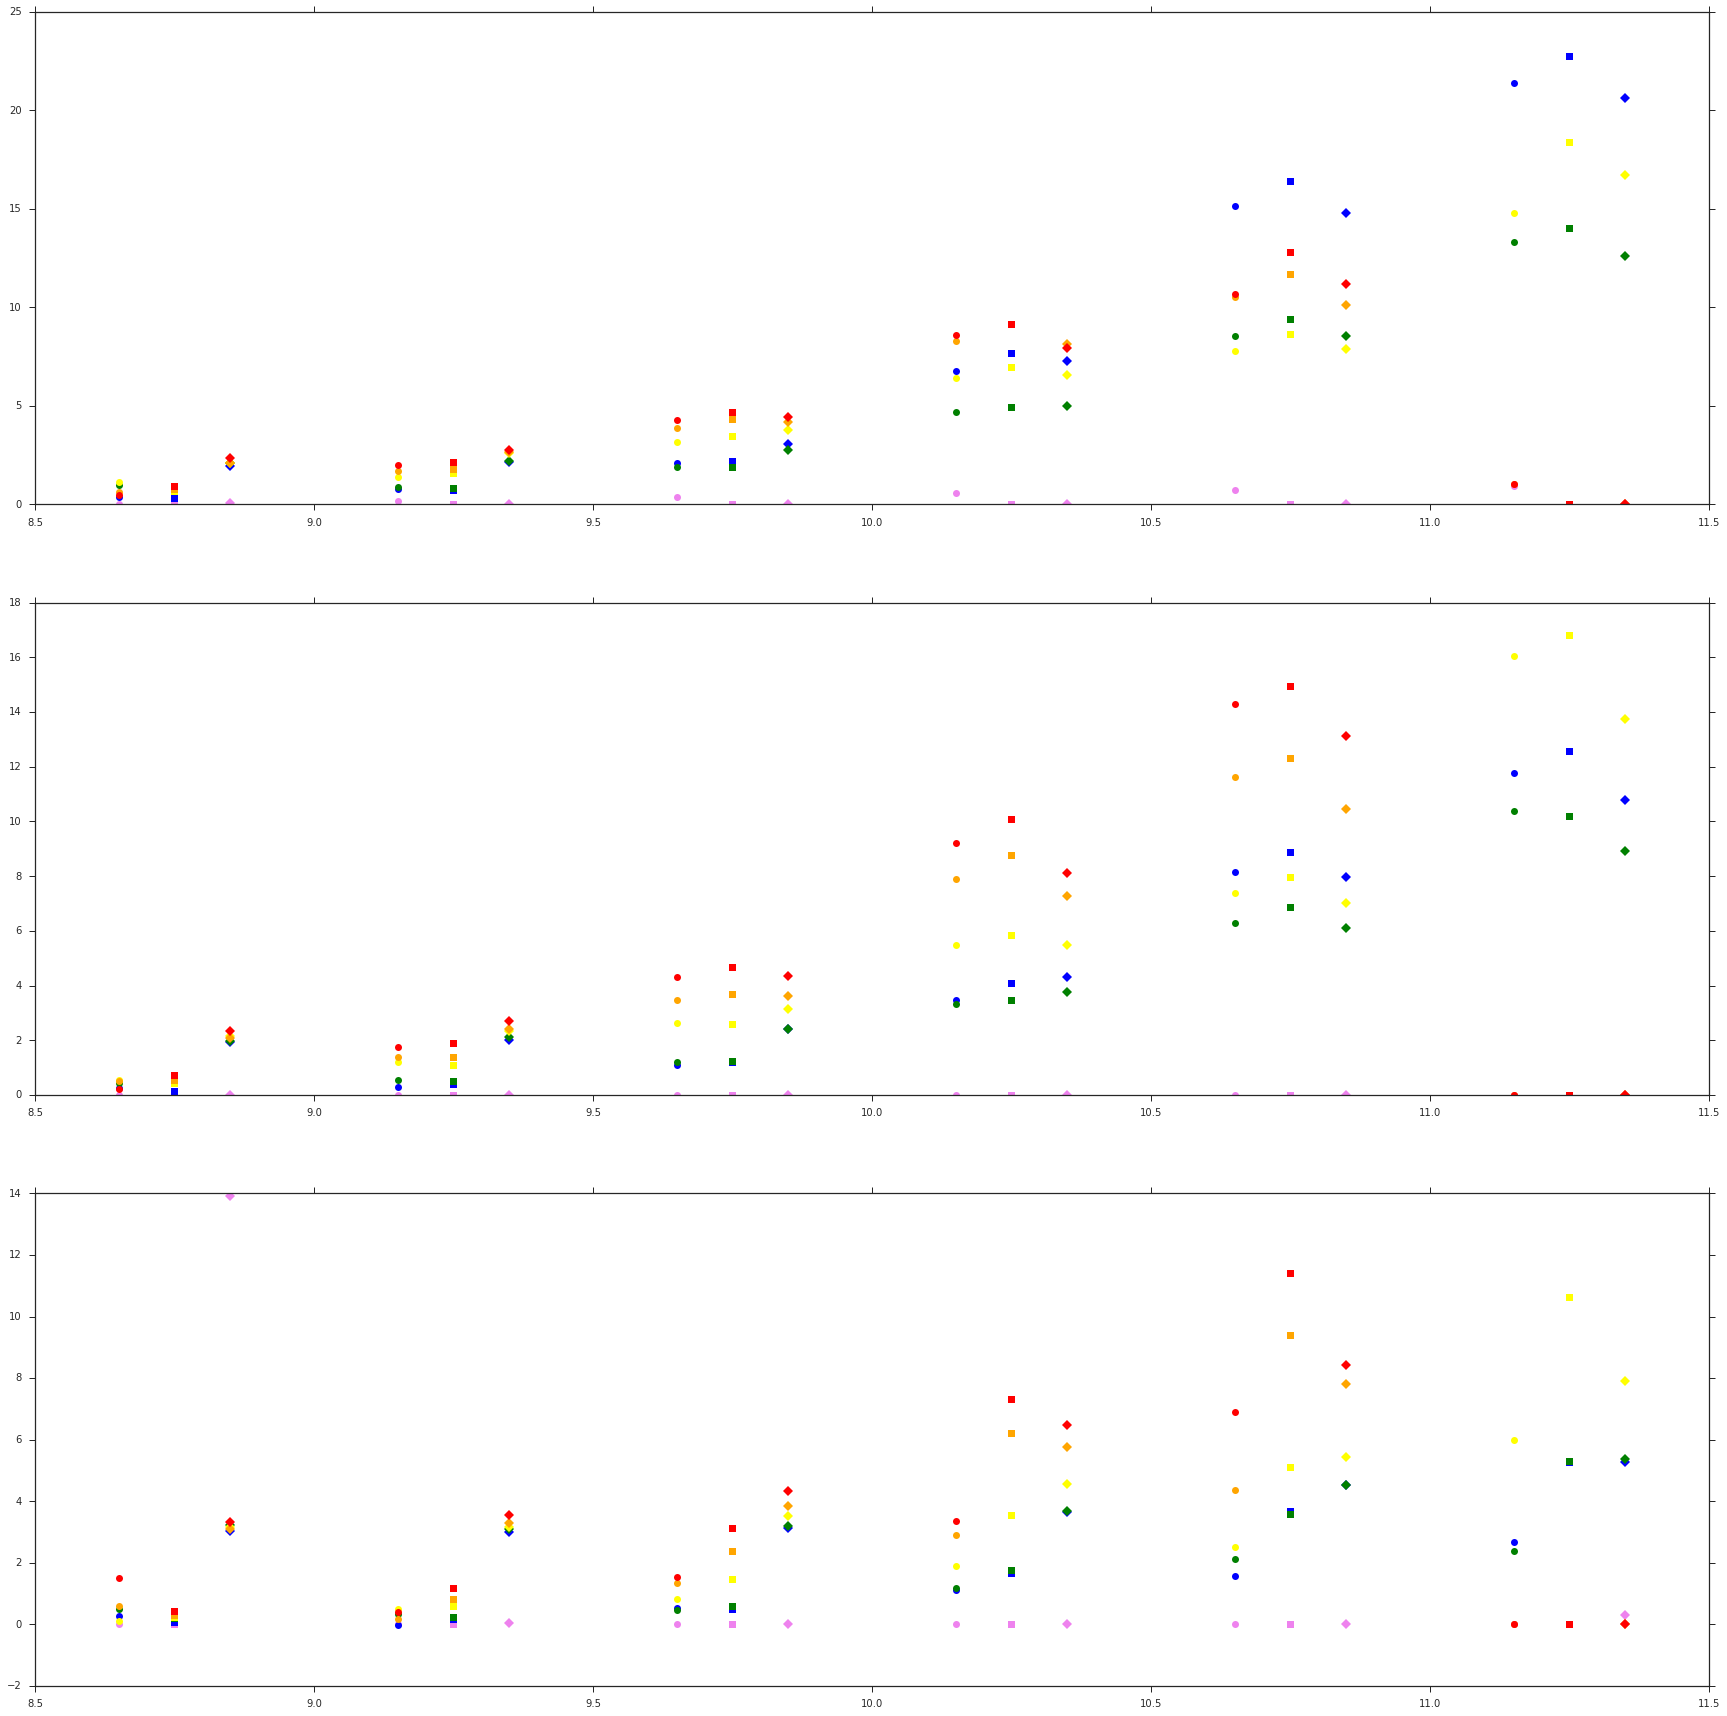

In [66]:
fig = plt.figure(figsize=(30,30))
color=['violet','blue','green','yellow','orange','red']
for i in range(0,bins_red.size+1):
    plt.subplot(3,1,1)
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S250_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S250_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S250_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])

    
    plt.subplot(3,1,2)

    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S350_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S350_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S350_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])

    plt.subplot(3,1,3)

    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)-0.1,S500_Mstar[:,i],'o',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0),S500_Mstar_truth[:,i],'s',color=color[i])
    plt.plot(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)+0.1,np.mean(S500_Mstar_xidplus[:,i,:],axis=1),'D',color=color[i])


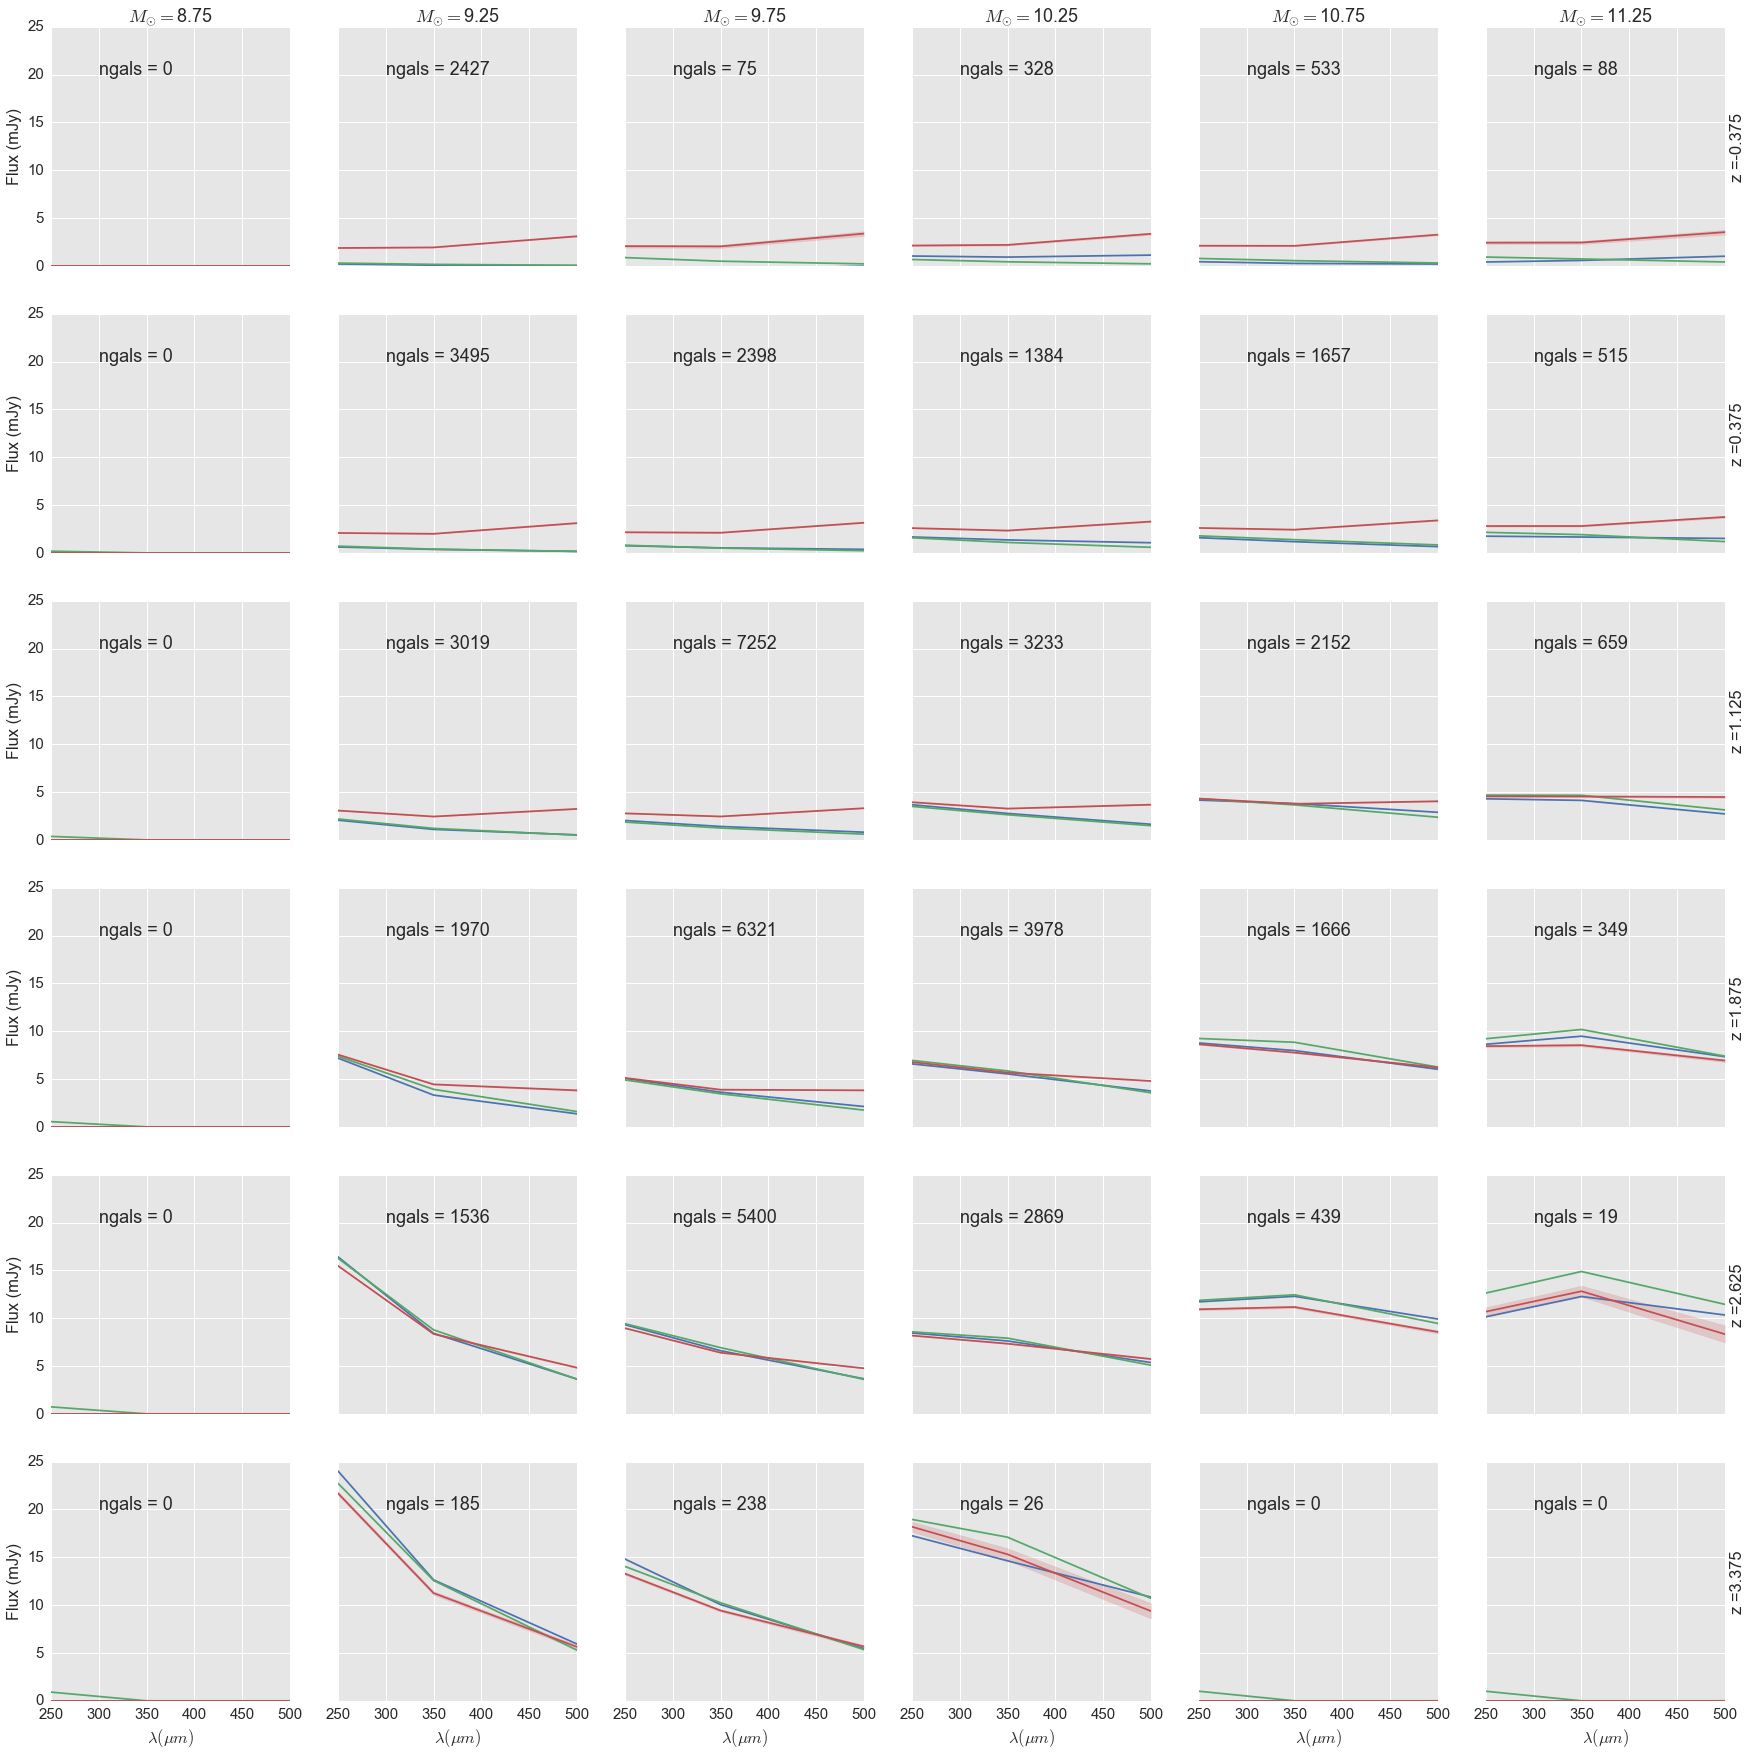

In [149]:
pp = PdfPages('/Users/pdh21/HELP/XID_plus/Paper/Stacking.pdf')
sns.set(font_scale=1.5)
plt.figure(figsize=(30,30))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

f, axarr = plt.subplots(bins_mstar.size+1,bins_red.size+1, sharex='col', sharey='row',figsize=(30,30))
color=['violet','blue','green','yellow','orange','red']
wave=[250,350,500]
ii=1
for i in range(0,bins_mstar.size+1):
    for j in range(0,bins_red.size+1):
        
        axarr[i,j].plot(wave,[S250_Mstar[i,j],S350_Mstar[i,j],S500_Mstar[i,j]])
        axarr[i,j].plot(wave,[S250_Mstar_truth[i,j],S350_Mstar_truth[i,j],S500_Mstar_truth[i,j]])
        axarr[i,j].plot(wave,[np.median(S250_Mstar_xidplus[i,j,:]),np.median(S350_Mstar_xidplus[i,j,:]),np.median(S500_Mstar_xidplus[i,j,:])])
        sigmas=[np.percentile(S250_Mstar_xidplus[i,j,:],16),np.percentile(S350_Mstar_xidplus[i,j,:],16),np.percentile(S500_Mstar_xidplus[i,j,:],16),np.percentile(S250_Mstar_xidplus[i,j,:],84),np.percentile(S350_Mstar_xidplus[i,j,:],84),np.percentile(S500_Mstar_xidplus[i,j,:],84)]
        #print sigmas
        if sum(np.array(sigmas) >0.0) >0:
            #print np.array(wave).shape,np.array([np.percentile(S250_Mstar_xidplus[i,j,:],84),np.percentile(S350_Mstar_xidplus[i,j,:],84),np.percentile(S500_Mstar_xidplus[i,j,:],84)]).shape,np.array([np.percentile(S250_Mstar_xidplus[i,j,:],16),np.percentile(S350_Mstar_xidplus[i,j,:],16),np.percentile(S500_Mstar_xidplus[i,j,:],16)]).shape
            axarr[i,j].fill_between(np.array(wave),np.array([np.percentile(S250_Mstar_xidplus[i,j,:],84),np.percentile(S350_Mstar_xidplus[i,j,:],84),np.percentile(S500_Mstar_xidplus[i,j,:],84)]),y2=np.array([np.percentile(S250_Mstar_xidplus[i,j,:],16),np.percentile(S350_Mstar_xidplus[i,j,:],16),np.percentile(S500_Mstar_xidplus[i,j,:],16)]),color='r',alpha=0.2)
        axarr[j,0].set_ylabel(r'Flux (mJy)')
        axarr[i,j].set_ylim(0,25)
        axarr[i,j].text(300,20,'ngals = '+str(ngals[i,j].astype(int)))


    axarr[0,i].set_title(r'$M_{\odot}=$'+str(np.append(bins_mstar-(bins_mstar[1]-bins_mstar[0])/2.0,bins_mstar[-1]+(bins_mstar[1]-bins_mstar[0])/2.0)[i]))
    axarr[-1,i].set_xlabel(r'$\lambda (\mu m)$')   

for j in range(0,bins_red.size+1):   
    axarr[j,-1].set_ylabel(r'z ='+str(np.append(bins_red-(bins_red[1]-bins_red[0])/2.0,bins_red[-1]+(bins_red[1]-bins_red[0])/2.0)[j]))
    axarr[j,-1].yaxis.set_label_position("right")
pp.savefig(f)
pp.close()

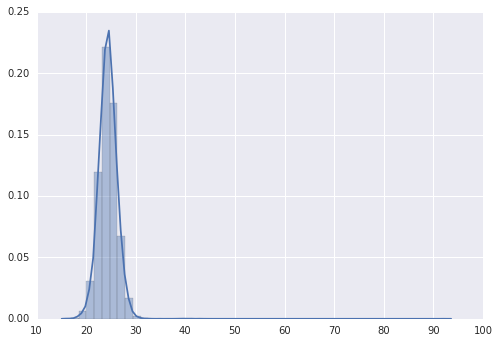

In [116]:
sns.distplot(fcat_sim['APPGSO_TOT_EXT'])

In [151]:
print np.append(bins_red-(bins_red[1]-bins_red[0])/2.0,bins_red[-1]+(bins_red[1]-bins_red[0])/2.0)

[-0.375  0.375  1.125  1.875  2.625  3.375]


In [168]:
#-----------------DESPHOT STUFF----------------------------------
#folder='/research/astro/fir/HELP/DESPHOT/'
folder='/Users/pdh21/HELP/XID_plus_output/plot_test/'
hdulist=fits.open(folder+'cosmos_itermap_lacey_07012015_simulated_observation_w_noise__PSWXID_S100_50mic_test.fits')
fcat=hdulist[1].data
nsources_xid=fcat.shape[0]
print nsources_xid
hdulist.close()

64824


In [172]:
print fcat['INRA']
print fcat_sim['RA'][idx_xidpT]

[ 149.96875     149.9961853   150.92584229 ...,  149.68118286  150.55633545
  150.73605347]
[ 149.96883137  149.99619909  150.92582623 ...,  149.68114305  150.55617263
  150.7361606 ]


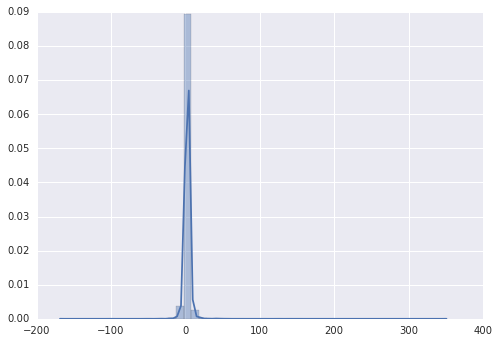

In [177]:
sns.distplot(fcat_sim['S250'][idx_xidpT]-fcat['F250'])

In [192]:
from astropy.coordinates import match_coordinates_sky, SkyCoord
from astropy import units as u
c = SkyCoord(ra=fcat['INRA']*u.degree, dec=fcat['INDEC']*u.degree)  

ind=fcat['F250']==0.0
c = SkyCoord(ra=fcat['INRA'][ind]*u.degree, dec=fcat['INDEC'][ind]*u.degree)  

c1 = SkyCoord(ra=fcat['INRA'][np.invert(ind)]*u.degree, dec=fcat['INDEC'][np.invert(ind)]*u.degree)  

idxc, idxcatalog, d2d, d3d = c.search_around_sky(c1, 3/3600.0*u.deg)

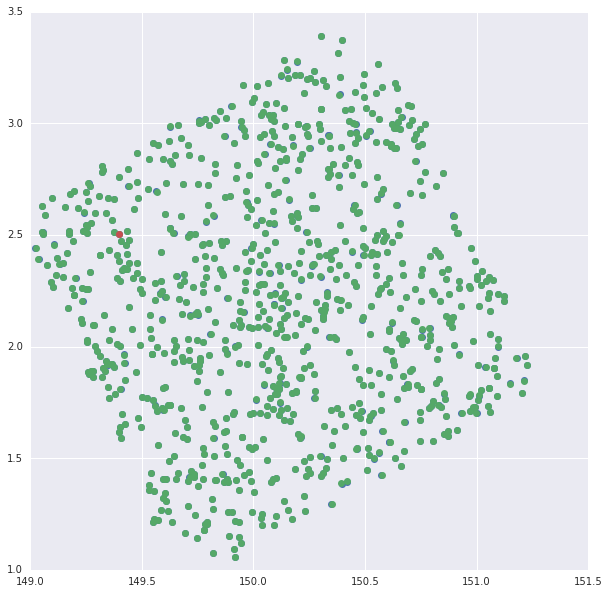

In [246]:
plt.figure(figsize=(10,10))
i=61
plt.plot(fcat['INRA'][np.invert(ind)][idxc],fcat['INDEC'][np.invert(ind)][idxc], 'o')
plt.plot(fcat['INRA'][ind][idxcatalog],fcat['INDEC'][ind][idxcatalog], 'o')
plt.plot(fcat['INRA'][ind][idxcatalog][i],fcat['INDEC'][ind][idxcatalog][i], 'o')

In [238]:
for i in range(0,idxcatalog.size):
    print fcat['F250'][ind][idxcatalog][i],fcat_sim['S250'][idx_xidp][ind][idxcatalog][i],fcat['F250'][np.invert(ind)][idxc][i],fcat_sim['S250'][idx_xidp][np.invert(ind)][idxc][i],i,d2d[i]

0.0 5.06749 9.08637 6.55545 0 0d00m01.9763s
0.0 3.29107 0.436831 0.504685 1 0d00m02.8348s
0.0 1.74941 10.8718 24.4044 2 0d00m01.7737s
0.0 2.38321 2.35933 2.59879 3 0d00m02.5174s
0.0 0.433671 8.28184 1.66551 4 0d00m00.4063s
0.0 4.9114 3.7197 4.09964 5 0d00m01.6514s
0.0 11.5703 14.0469 5.69614 6 0d00m00.2321s
0.0 12.3922 13.1496 2.25523 7 0d00m01.6194s
0.0 0.348009 4.43773 1.63702 8 0d00m01.7958s
0.0 0.684523 11.5076 18.7684 9 0d00m02.0876s
0.0 4.42946 1.33376 0.021137 10 0d00m02.3978s
0.0 2.3975 18.0406 22.236 11 0d00m02.7067s
0.0 0.83961 12.2578 8.73446 12 0d00m02.774s
0.0 11.2323 10.4057 0.143806 13 0d00m01.4207s
0.0 4.23661 1.39621 0.600531 14 0d00m01.4177s
0.0 1.22011 1.53685 1.86133 15 0d00m02.4914s
0.0 1.22437 0.259242 6.08292 16 0d00m02.3762s
0.0 4.38375 0.92401 0.345118 17 0d00m01.87s
0.0 0.10011 23.9257 25.3431 18 0d00m00.0054s
0.0 1.57841 3.02775 2.29788 19 0d00m00.3908s
0.0 20.5631 24.8763 8.02014 20 0d00m02.2894s
0.0 18.7315 12.3116 0.659448 21 0d00m01.7017s
0.0 1.24274 7.90

In [244]:
i=61
from xidplus import moc_routines
Tile=moc_routines.get_HEALPix_pixels(10,fcat['INRA'][ind][idxcatalog][i],fcat_sim['DEC'][idx_xidp][ind][idxcatalog][i])
print fcat['INRA'][ind][idxcatalog][i],fcat_sim['DEC'][idx_xidp][ind][idxcatalog][i]

149.398 2.50651382362


In [245]:
folder='/Users/pdh21/HELP/XID_plus/scripts/test_run/'
infile=folder+'Master_prior.pkl'
with open(infile, "rb") as f:
    obj = pickle.load(f)
tiles=obj['tiles']
order=obj['order']
print order
np.where(tiles==Tile)

10


(array([748]),)

In [243]:
print Tile

[6975355]
